# Problem Description.

### Context   
"It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase."

### Content    
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Objective    
We are required to modell the transactions in our dataset in order to do a binary classiffication of a new transaction as fradualant or not. The results thus obtained, will be used by the manageent of the organization providing the credit card service to it's customers to understand the key drivers behind a fradulant transaction and take appropriate meaures to prevent such transactions in the future.

### Data source  
* From Kaggle - https://www.kaggle.com/mlg-ulb/creditcardfraud

**Okay so prima facie, lets import some of the libraries we will be needing for this project.**  
(even if we are missing out on some library, we can always import it later on in the project.)

In [1]:
import sys

# library to handle vectorized data 
import numpy as np 
# library for data analsysis and manupulation
import pandas as pd 
# so that the output is not trunacated by pandas when we actually want to see it 
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100000)

# for visualisations
import seaborn as sns

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


# Loading the data.

In [2]:
data = pd.read_csv('data/creditcard.csv')
print('The dimensions of our data is : ', data.shape)

The dimensions of our data is :  (284807, 31)


In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory data analysis and data cleaning.

In [4]:
# let's check the fatures in our dataset
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
#Let's check the data types of the fatures in our dataset
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

AS we can see from above that the feature from V1 to V28 are the principal components provided by the data source due to confidentiality issues regarding sensitive informaion in the data, as these data points are related to rel-life transactions.  
Other than the principal components we have two other features representing the following :  
* 'Time' : representing the time(in sec) elapsed between each transaction and the first transaction in the dataset.  
* 'Amount' : representing the amount of the transactions.  
Other than these features, we also have our target feature representing the following :  
* 'Class' : representing the type of transaction lebel '0' or '1', where they represent - 
    * '0' > Not a fraudulant transaction
    * '1' > fraudulant transaction

#### Exploring the feature 'Time'.

In [6]:
# let's take a look at the value representation of this feature
data.loc[1013,'Time']

764.0

In [7]:
# let's takea look at the range of the feaure 'Time'
print("The minimum and maximum values in the feature 'Time' are {}, {} respectively. (in seconds)". format(data['Time'].min(),data['Time'].max()))

The minimum and maximum values in the feature 'Time' are 0.0, 172792.0 respectively. (in seconds)


Text(0, 0.5, 'Time(in sec) between each transaction and the first transaction')

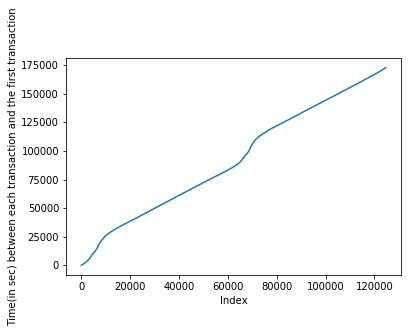

In [8]:
#let's take a look at the all the different values in the feature 'Time' in our data
pd.Series(data['Time'].value_counts().index.sort_values(ascending=True)).plot.line()
plt.xlabel('Index')
plt.ylabel('Time(in sec) between each transaction and the first transaction')

As we can see from above that the values in the feature 'Time' is represented in seconds, which is not very user friendly in terms of the degree of intutional explanaiblity; so we are going to convert the values to be represented in minutes for this feature.

In [9]:
# converting the feature to be represente din minutes and also rounding them up to 2 decimal places.
data['Time'] = data['Time'].apply(lambda x: round(x/60, 2))

Text(0, 0.5, 'Time(in min) between each transaction and the first transaction')

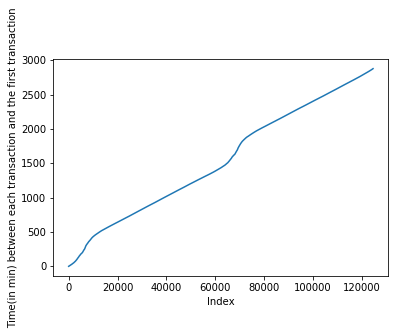

In [10]:
# now lets take a look at the all the different values in the feature 'Time'
pd.Series(data['Time'].value_counts().index.sort_values(ascending=True)).plot.line()
plt.xlabel('Index')
plt.ylabel('Time(in min) between each transaction and the first transaction')

#### Exploring the feature 'Amount'.

In [11]:
# let's take a look at the value representation of this feature
data.loc[957, 'Amount']

179.84

Text(0, 0.5, 'Amount of the transactions')

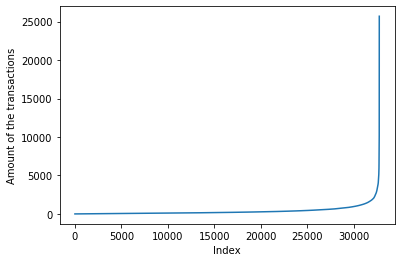

In [12]:
#let's take a look at the all the different values in the feature 'Amount' in our data
pd.Series(data['Amount'].value_counts().index.sort_values(ascending=True)).plot.line()
plt.xlabel('Index')
plt.ylabel('Amount of the transactions')

As we can see from above that the amount of the transaction grew exponentially with the growing number of transactions.

#### Exploring the feature 'Class'.

In [13]:
print('Not a fraudulant transaction > ', round(data['Class'].value_counts()[0]/len(data) * 100,2), '%')
print('Fraudulant transactions > ', round(data['Class'].value_counts()[1]/len(data) * 100,2), '%')

Not a fraudulant transaction >  99.83 %
Fraudulant transactions >  0.17 %


Text(0, 0.5, 'Frequency')

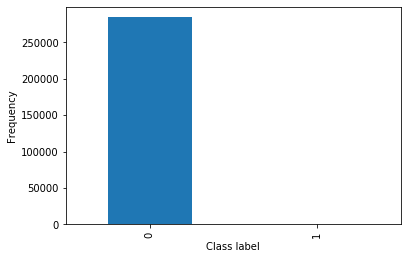

In [14]:
(data['Class'].value_counts()).plot.bar()
plt.xlabel('Class label')
plt.ylabel('Frequency')

Notice how the dataset is highly imbalanced for the case of the target feature. Most of the transactions in the dataset is not a fradulant transaction. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud. We will need to address this issue later.

## Descriptive statistical analysis

In [15]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1580.230997,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,791.469107,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,903.360000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1411.530000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,2322.010000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2879.870000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


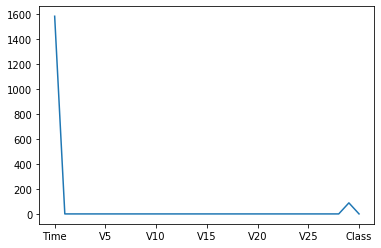

In [16]:
# visualizing the mean values for our features
(data.describe().loc['mean', :]).plot.line()

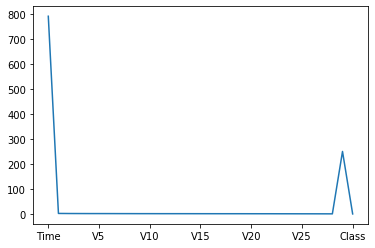

In [17]:
# visualizing the standard deviation values for our features
(data.describe().loc['std', :]).plot.line()

As we can see from above that the for both 'mean' and 'std' of our features, there are positive spikes in the case of the features 'Time'and 'Amount'; other than that we can observe tht the rest of thefeatures are scalled, which is why their mean and std are same.

## Correlational analysis

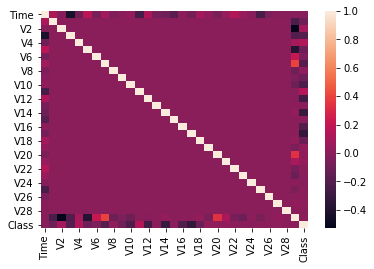

In [18]:
# Visualization of the correlation between the features.
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

As we can see from above that most of the features in our dataset are showing zero correlation within the feature space.

# Handling missing values

In [19]:
# let's check for missing values in our dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As we can see from above that we do no hae any missing values in our dataset.

# Data analysis utilising visualiztions

 Let's visualize the distributions of hefeatures in our dataset, so that we can have an idea how skewed are these features.

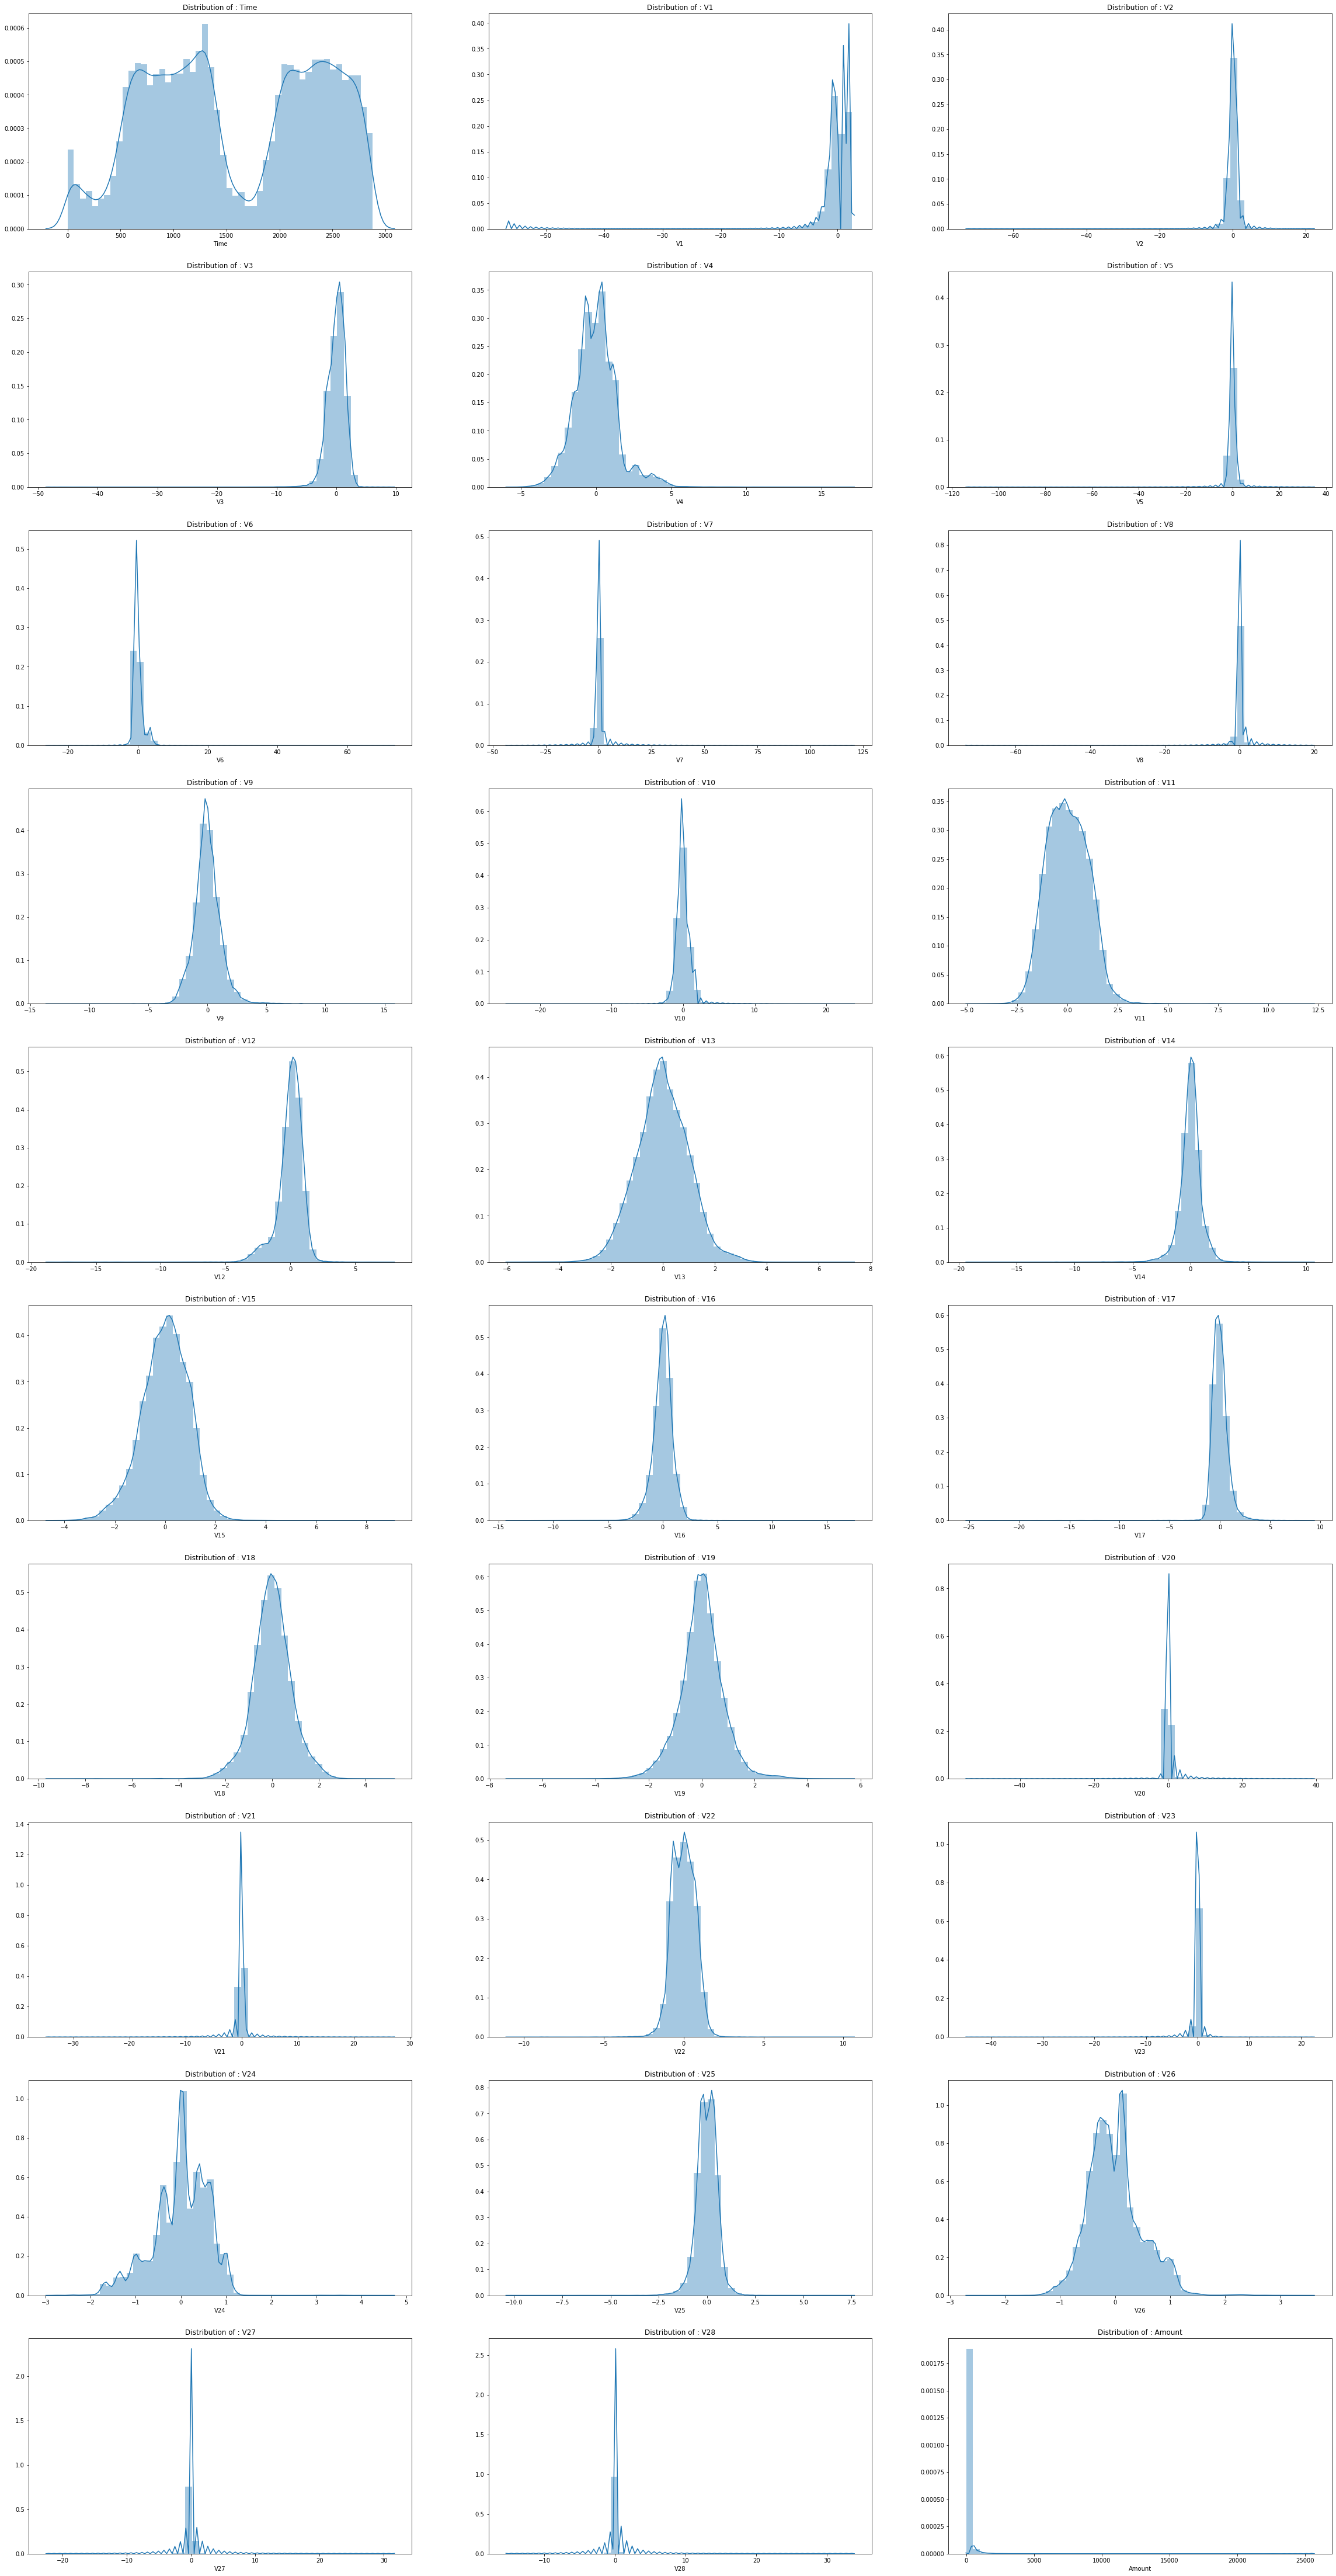

In [20]:
f, axes = plt.subplots(10, 3, figsize=(40,80))
features = list(data.drop('Class', axis=1).columns)
for feature, x in zip(features, range(len(features))) :
    sns.distplot(data[feature], ax=axes.flatten()[x])
    axes.flatten()[x].set_title('Distribution of : {}'.format(feature))

As we can see from above that the independent features in our dataset do not have a normal distribution, which is unexpected given the fact that most of these features have been taken through a dimensionality reducton technnique called 'Principal Component Analysis'. Hence we will be scalling the features in the comming steps.  
We can also see from above that the standard deviation of the means of the features is high, validating the statement.

# Feature encoding

* We can encode the feature 'Amount' by further discretizing it into 'n' number of bins; which wuld improve the signal-noise ration in our dataset, and in turn our model will be better at accurately classifying the type of a particular transaction. But we are not going to do so; becuse after the deploymen of this model, when new unseen data will be comming in to be classified, there is a substantial chance that the amount of that transaction in out of the range of the feature 'Amount' in our dataset, in which case our model will be performing poorly in that scenario.


* In other word, by the further discretization of the feature 'Amount' we will be improving the signal-noise ratio in our dataset, but in the same time we will be introducing unwanted biases in our model. 


* Same logic goes for the feature 'Time'.

In [21]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.02,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.02,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.03,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Saving the feature and target spaces.

In [22]:
# features
x_data = data.drop('Class', axis=1)
# target
y_data = data['Class']

# saving the above
data.to_csv('data/cleaned_data.csv')
x_data.to_csv('data/feature_space.csv')
y_data.to_csv('data/target_space.csv')